In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.layers import *
from keras.models import Model
import keras

In [2]:
data_dir = './UTKFace'

In [3]:
from PIL import Image
image = Image.open(data_dir+'/1_0_0_20161219140623097.jpg.chip.jpg')
image.show()

데이터 불균형

전체 데이터셋에 대해 언더샘플링과 오버샘플링을 적용

In [4]:
data_dir = './UTKFace'

file_names = os.listdir(data_dir)
ages = [int(file_name.split('_')[0]) for file_name in file_names]
race = [int(file_name.split('_')[2]) for file_name in file_names]

df = pd.DataFrame({'file_name': file_names, 'age': ages})

print(df['age'].value_counts())
df

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
111       1
103       1
Name: age, Length: 104, dtype: int64


,file_name,age
0,40_1_3_20170116191729090.jpg.chip.jpg,40
1,41_0_3_20170119143544485.jpg.chip.jpg,41
2,1_1_2_20161219200230867.jpg.chip.jpg,1
3,46_1_0_20170109142329559.jpg.chip.jpg,46
4,49_1_0_20170109220635624.jpg.chip.jpg,49
...,...,...
23703,69_0_0_20170117172119964.jpg.chip.jpg,69
23704,65_1_3_20170109143047483.jpg.chip.jpg,65
23705,50_0_0_20170116225153572.jpg.chip.jpg,50
23706,28_0_3_20170119194725939.jpg.chip.jpg,28


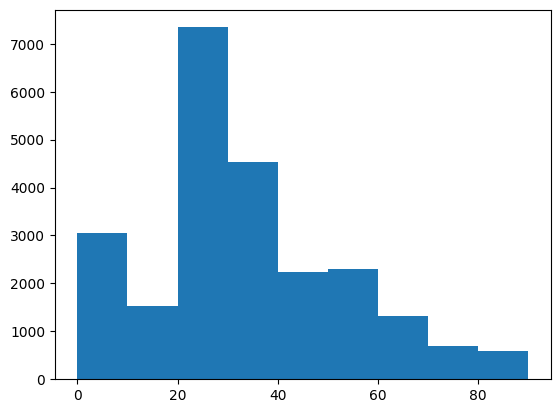

In [5]:
plt.hist(df['age'], bins=range(0, 100, 10))
plt.show()

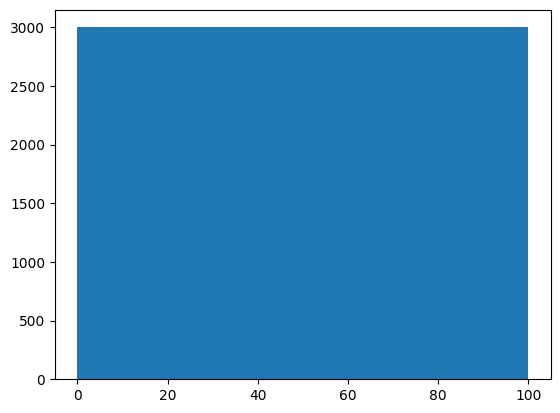

[                                  file_name  age
2      1_1_2_20161219200230867.jpg.chip.jpg    1
16     2_0_4_20161221192651909.jpg.chip.jpg    2
18     3_1_4_20170103210847515.jpg.chip.jpg    3
20     5_1_3_20161219225406048.jpg.chip.jpg    5
21     2_0_0_20170110212905173.jpg.chip.jpg    2
...                                     ...  ...
23689  4_1_1_20170109194538070.jpg.chip.jpg    4
23692  3_1_2_20161219212214190.jpg.chip.jpg    3
23696  2_0_4_20161221202954025.jpg.chip.jpg    2
23699  8_1_0_20170109200918322.jpg.chip.jpg    8
23702  4_0_0_20170110213557125.jpg.chip.jpg    4

[3062 rows x 2 columns],                                    file_name  age
9      18_0_0_20170117140129888.jpg.chip.jpg   18
12     14_1_0_20170104011842010.jpg.chip.jpg   14
22     12_1_0_20170104005712405.jpg.chip.jpg   12
24     19_0_0_20170116220704294.jpg.chip.jpg   19
26     13_0_0_20170110232526929.jpg.chip.jpg   13
...                                      ...  ...
23643  10_0_0_20170110220514186.jpg

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# 이미지 파일이 저장된 경로
data_path = './UTKFace'

# 데이터셋을 읽어들입니다.
data = df

# 각 나이별로 데이터를 분할합니다.
age_groups = [(0, 9), (10, 19), (20, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 99)]
age_data = [data[(data['age'] >= group[0]) & (data['age'] <= group[1])] for group in age_groups]

# 각 나이 그룹에서 샘플링할 개수를 정합니다.
target_size = 3000
sample_sizes = [target_size] * len(age_data)


# 언더샘플링을 수행합니다.
sampled_data = []
for group, size in zip(age_data, sample_sizes):
    if len(group) >= size:
        sampled_group = resample(group, replace=False, n_samples=size, random_state=42)
    else:
        sampled_group = group
    sampled_data.append(sampled_group)
new_data = pd.concat(sampled_data)

# 오버샘플링을 수행합니다.
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = new_data.iloc[:, :-1].values, new_data['age'].values
X_resampled, y_resampled = ros.fit_resample(X, y)
new_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['age'])], axis=1)

# 각 나이 그룹에서 3000개씩 샘플링합니다.
sampled_data = []
for group, size in zip(age_data, sample_sizes):
    if len(group) > size:
        sampled_group = resample(group, replace=False, n_samples=size, random_state=42)
    else:
        sampled_group = group.sample(size, replace=True, random_state=42)
    sampled_data.append(sampled_group)
new_data = pd.concat(sampled_data)


# 나이 분포를 시각화합니다.
plt.hist(new_data['age'], bins=range(0, 101, 10))
plt.show()


print(age_data)

In [7]:
new_data

,file_name,age
13677,1_1_0_20170109191253730.jpg.chip.jpg,1
1447,1_1_2_20161219162225422.jpg.chip.jpg,1
10405,1_0_2_20161219200203132.jpg.chip.jpg,1
11114,1_0_1_20170110213647161.jpg.chip.jpg,1
12083,1_0_0_20161219154724341.jpg.chip.jpg,1
...,...,...
16104,90_1_0_20170120225317689.jpg.chip.jpg,90
8015,92_1_0_20170110183501116.jpg.chip.jpg,92
23619,90_1_0_20170120225510266.jpg.chip.jpg,90
13965,95_1_0_20170117174948948.jpg.chip.jpg,95


<h1>데이터 전처리</h1>

In [8]:
dataset = new_data.copy()
dataset

,file_name,age
13677,1_1_0_20170109191253730.jpg.chip.jpg,1
1447,1_1_2_20161219162225422.jpg.chip.jpg,1
10405,1_0_2_20161219200203132.jpg.chip.jpg,1
11114,1_0_1_20170110213647161.jpg.chip.jpg,1
12083,1_0_0_20161219154724341.jpg.chip.jpg,1
...,...,...
16104,90_1_0_20170120225317689.jpg.chip.jpg,90
8015,92_1_0_20170110183501116.jpg.chip.jpg,92
23619,90_1_0_20170120225510266.jpg.chip.jpg,90
13965,95_1_0_20170117174948948.jpg.chip.jpg,95


In [9]:
dataset['path'] = dataset['file_name'].apply(lambda x: f"{data_dir}/{x}")

In [10]:
import pandas as pd
import numpy as np

agelist = [
    (dataset['age'] < 10) ,
    (dataset['age'] >= 10) & (dataset['age'] < 20),
    (dataset['age'] >= 20) & (dataset['age'] < 30),
    (dataset['age'] >= 30) & (dataset['age'] < 40),
    (dataset['age'] >= 40) & (dataset['age'] < 50),
    (dataset['age'] >= 50) & (dataset['age'] < 60),
    (dataset['age'] >= 60) & (dataset['age'] < 70),
    (dataset['age'] >= 70) & (dataset['age'] < 80),
    (dataset['age'] >= 80) & (dataset['age'] < 90),
    (dataset['age'] >= 90)]

ageRangeList = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

dataset['ageRange'] = np.select(agelist, ageRangeList, default='')

In [11]:
dataset = dataset.drop(['file_name', 'age'], axis=1)
dataset

,path,ageRange
13677,./UTKFace/1_1_0_20170109191253730.jpg.chip.jpg,0
1447,./UTKFace/1_1_2_20161219162225422.jpg.chip.jpg,0
10405,./UTKFace/1_0_2_20161219200203132.jpg.chip.jpg,0
11114,./UTKFace/1_0_1_20170110213647161.jpg.chip.jpg,0
12083,./UTKFace/1_0_0_20161219154724341.jpg.chip.jpg,0
...,...,...
16104,./UTKFace/90_1_0_20170120225317689.jpg.chip.jpg,90
8015,./UTKFace/92_1_0_20170110183501116.jpg.chip.jpg,90
23619,./UTKFace/90_1_0_20170120225510266.jpg.chip.jpg,90
13965,./UTKFace/95_1_0_20170117174948948.jpg.chip.jpg,90


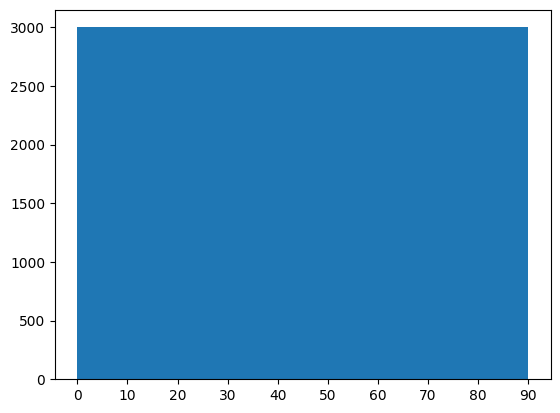

In [12]:
# 나이 분포를 시각화합니다.
plt.hist(dataset['ageRange'])
plt.show()

In [14]:
dataset.to_pickle("./dataset.pkl")

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

batch_size = 32
epochs = 50
input_shape = (256, 256, 3)

# 이미지 증강 세팅
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)



# 학습 데이터셋 생성
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    x_col='path',
    y_col='ageRange',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode='categorical'
)

# 검증 데이터셋 생성
test_generator = test_datagen.flow_from_dataframe(
    test_data,
    x_col='path',
    y_col='ageRange',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode='categorical'
)

Found 24000 validated image filenames belonging to 10 classes.
Found 6000 validated image filenames belonging to 10 classes.


<h1>학습</h1>

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# tf.keras.layers.Dropout(0.2)

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델을 학습합니다.
checkpoint_path = "./best_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

In [24]:
model.load_weights("./best_model.h5")

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[checkpoint]
)

Epoch 1/50
750/750 [==============================] - ETA: 0s - loss: 1.4220 - accuracy: 0.4280
Epoch 00001: val_accuracy did not improve from 0.47667
750/750 [==============================] - 217s 289ms/step - loss: 1.4220 - accuracy: 0.4280 - val_loss: 1.3534 - val_accuracy: 0.4490
Epoch 2/50
750/750 [==============================] - ETA: 0s - loss: 1.4046 - accuracy: 0.4354
Epoch 00002: val_accuracy did not improve from 0.47667
750/750 [==============================] - 216s 288ms/step - loss: 1.4046 - accuracy: 0.4354 - val_loss: 1.3118 - val_accuracy: 0.4673
Epoch 3/50
750/750 [==============================] - ETA: 0s - loss: 1.4037 - accuracy: 0.4362
Epoch 00003: val_accuracy improved from 0.47667 to 0.48517, saving model to ./best_model.h5
750/750 [==============================] - 217s 290ms/step - loss: 1.4037 - accuracy: 0.4362 - val_loss: 1.2920 - val_accuracy: 0.4852
Epoch 4/50
750/750 [==============================] - ETA: 0s - loss: 1.4022 - accuracy: 0.4358
Epoch 000

Epoch 29/50
750/750 [==============================] - ETA: 0s - loss: 1.3282 - accuracy: 0.4705
Epoch 00029: val_accuracy did not improve from 0.51417
750/750 [==============================] - 224s 299ms/step - loss: 1.3282 - accuracy: 0.4705 - val_loss: 1.2520 - val_accuracy: 0.5018
Epoch 30/50
750/750 [==============================] - ETA: 0s - loss: 1.3246 - accuracy: 0.4705
Epoch 00030: val_accuracy did not improve from 0.51417
750/750 [==============================] - 229s 305ms/step - loss: 1.3246 - accuracy: 0.4705 - val_loss: 1.2348 - val_accuracy: 0.5062
Epoch 31/50
750/750 [==============================] - ETA: 0s - loss: 1.3204 - accuracy: 0.4705
Epoch 00031: val_accuracy improved from 0.51417 to 0.51450, saving model to ./best_model.h5
750/750 [==============================] - 220s 293ms/step - loss: 1.3204 - accuracy: 0.4705 - val_loss: 1.2268 - val_accuracy: 0.5145
Epoch 32/50
750/750 [==============================] - ETA: 0s - loss: 1.3166 - accuracy: 0.4762
Epoch